In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from jcopml.plot import plot_missing_value 


from scipy.stats import multivariate_normal

In [121]:
data = pd.read_csv("CCGENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


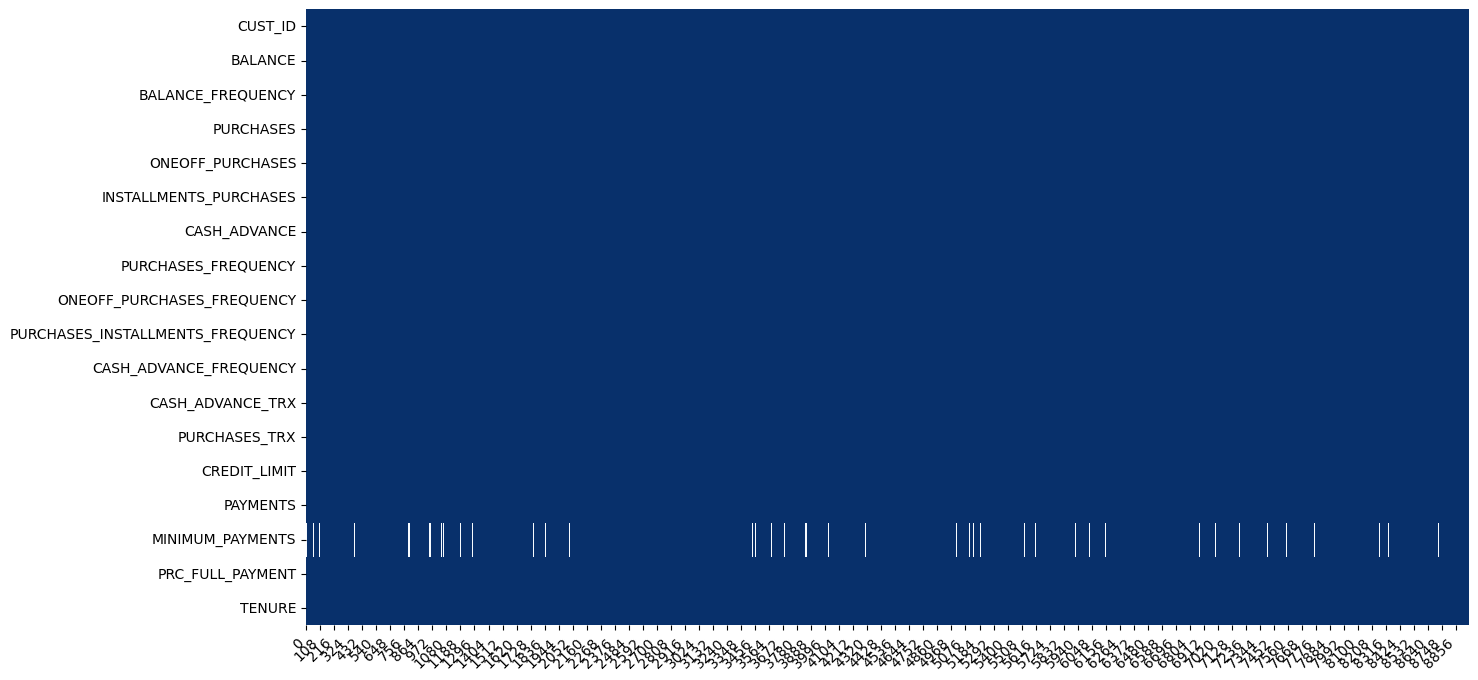

In [122]:
# cek missing data 
plot_missing_value(data)

In [123]:
data.fillna(1.0, inplace = True)

In [124]:
data_cleansing = data.drop(['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'], axis=1)

In [125]:
data_cleansing.to_csv("newCCGENERAL.csv", index=False)

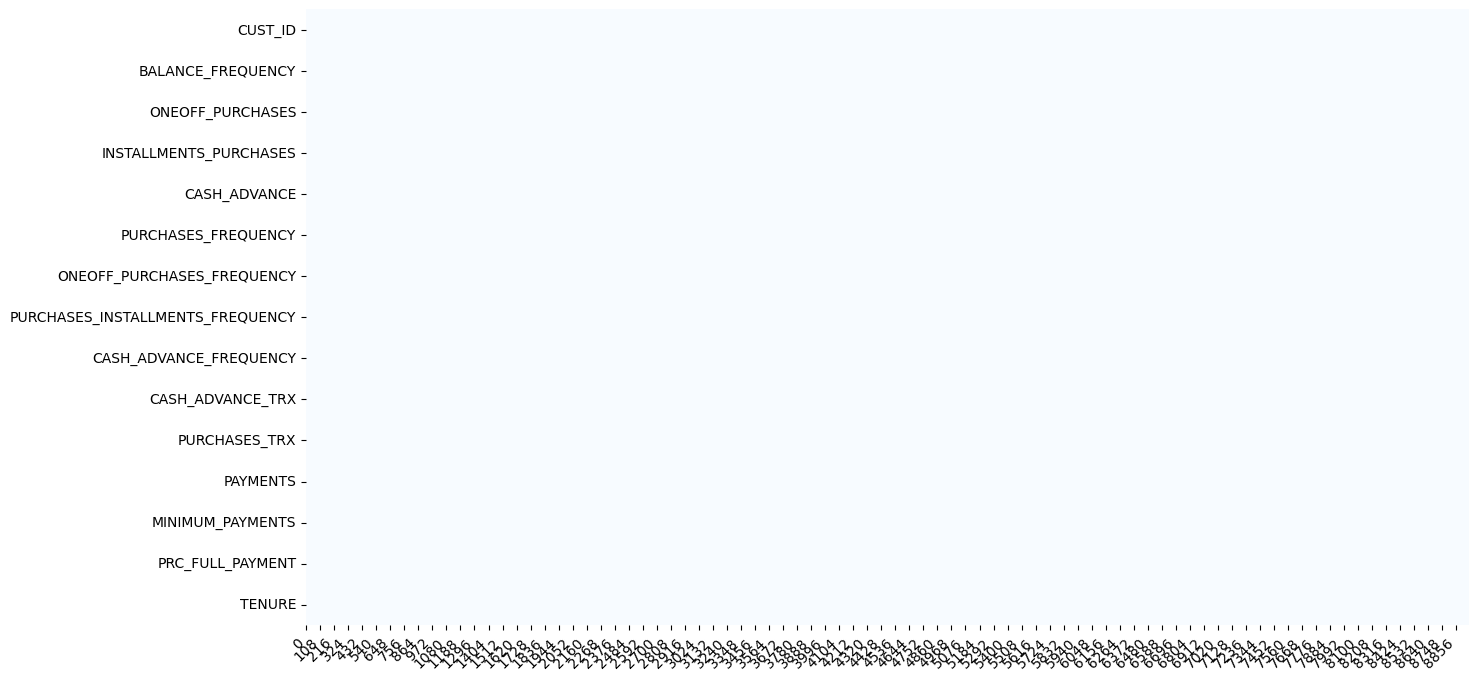

In [126]:
plot_missing_value(data_cleansing)

In [127]:
data_cleansing.head()

,CUST_ID,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.818182,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,139.509787,0.000000,12
1,C10002,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,1072.340217,0.222222,12
2,C10003,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,627.284787,0.000000,12
3,C10004,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,1.000000,0.000000,12
4,C10005,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,244.791237,0.000000,12


In [128]:
clustering_data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]
from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(clustering_data)
data["CREDIT_CARD_SEGMENTS"] = clusters

In [129]:
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})
print(data["CREDIT_CARD_SEGMENTS"].head(10))

0    Cluster 3
1    Cluster 1
2    Cluster 1
3    Cluster 1
4    Cluster 3
5    Cluster 3
6    Cluster 2
7    Cluster 3
8    Cluster 1
9    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


In [ ]:
num_clusters = 3

In [133]:
import pandas as pd
from sklearn.cluster import KMeans

# Data Anda
clustering_data = data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
data = pd.DataFrame(data)

# Inisialisasi model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=3, random_state=0)

# Melakukan K-Means clustering dan mendapatkan label klaster
data['CREDIT_CARD_SEGMENTS'] = kmeans.fit_predict(clustering_data)

# Tampilkan DataFrame dengan label klaster
print(data)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [140]:
# Inisialisasi model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=3, random_state=0)

# Melakukan K-Means clustering dan mendapatkan label klaster
data['CREDIT_CARD_SEGMENTS'] = kmeans.fit_predict(clustering_data)

# Mengambil pusat klaster (mu) dari model K-Means
mu = kmeans.cluster_centers_

# Menampilkan pusat klaster (mu)
print("Pusat Klaster (mu) dari data:")
print(mu)

Pusat Klaster (mu) dari data:
[[3.39064348e+03 9.40721957e-01 1.58452502e+03 9.90025106e+02
  5.94811060e+02 2.11505698e+03 5.40464298e-01 3.17432988e-01
  3.85510406e-01 2.10355452e-01 5.73402868e+00 2.21538462e+01
  8.99865474e+03 2.89529965e+03 1.54893913e+03 1.34632082e-01
  1.17388092e+01]
 [8.54537956e+02 8.54196809e-01 6.02865694e+02 3.11966211e+02
  2.91198406e+02 4.94609866e+02 4.67436719e-01 1.53956642e-01
  3.52219486e-01 1.06774426e-01 2.25295291e+00 1.06566958e+01
  2.74495699e+03 9.96209083e+02 5.48284855e+02 1.56845536e-01
  1.14327351e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.50836148e+03 3.34474108e-01
  1.18384615e+01]]


In [134]:
import numpy as np

# Inisialisasi model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=3, random_state=0)

# Melakukan K-Means clustering dan mendapatkan label klaster
data['CREDIT_CARD_SEGMENTS'] = kmeans.fit_predict(clustering_data)

# Hitung matriks kovariansi untuk setiap klaster
num_clusters = 3  
sigma = [np.cov(clustering_data[data['CREDIT_CARD_SEGMENTS'] == j].T) for j in range(num_clusters)]

# Menampilkan matriks kovariansi
print("Matriks kovariansi (sigma) dari data:")
for i, cov_matrix in enumerate(sigma):
    print(f"Klaster {i}:")
    print(cov_matrix)
    print()

Matriks kovariansi (sigma) dari data:
Klaster 0:
[[ 5.89555191e+06  6.60014749e+00  2.88247945e+06  9.07207857e+04
   2.79175867e+06  1.63187043e+06 -2.00273620e+01  1.44032488e+01
  -1.98051966e-02  8.51269015e+01  3.24608276e+03  2.01181305e+04
   5.82853878e+06  2.64564457e+06  1.71699522e+07 -4.43032415e+00
   5.37623061e+01]
 [ 6.60014749e+00  2.12246007e-03  1.42431676e-01 -1.23621984e+00
   1.37865151e+00 -1.71621363e+01 -1.60906409e-03 -4.47657610e-04
  -1.20679817e-03 -2.80176579e-04 -3.94627705e-02  1.03099070e-01
  -3.40908750e+01 -4.11617764e+01  5.47499933e+01  1.72175448e-05
   5.57850682e-03]
 [ 2.88247945e+06  1.42431676e-01  4.26373394e+06  2.80204116e+05
   3.98352983e+06  5.29465099e+05  4.20928222e+02  5.04219798e+01
   4.22950615e+02 -1.93024196e+01  7.24748023e+02  3.75978959e+04
   2.14728571e+06  2.45960343e+06  5.63054512e+06 -1.11967545e+00
   9.74977273e-01]
 [ 9.07207857e+04 -1.23621984e+00  2.80204116e+05  1.47539630e+05
   1.32664485e+05  4.84950913e+04 -5

In [135]:
# Jumlah komponen Gaussian
num_components = 3  

# Jumlah titik data
nt = len(clustering_data)

# Menghitung probabilitas prior (phi) untuk masing-masing komponen
phi = np.array([np.sum(data['CREDIT_CARD_SEGMENTS'] == i) / nt for i in range(num_components)])

# Menampilkan probabilitas prior (phi) untuk masing-masing komponen
for i in range(num_components):
    print(f"Probabilitas Prior (phi) komponen Gaussian ke-{i + 1}: {phi[i]}")

print("Probabilitas Prior (phi) untuk semua komponen:")
print(phi)


Probabilitas Prior (phi) komponen Gaussian ke-1: 0.006256983240223463
Probabilitas Prior (phi) komponen Gaussian ke-2: 0.07240223463687151
Probabilitas Prior (phi) komponen Gaussian ke-3: 0.2871508379888268
Probabilitas Prior (phi) untuk semua komponen:
[0.00625698 0.07240223 0.28715084]


In [141]:
from scipy.stats import multivariate_normal

# Inisialisasi log likelihood
log_likelihood = 0

# Loop melalui setiap titik data
for i in range(len(clustering_data)):
    likelihood = 0
    # Loop melalui setiap komponen Gaussian
    for j in range(num_components):
        # Hitung likelihood dari titik data terhadap komponen Gaussian ke-j
        likelihood += phi[j] * multivariate_normal.pdf(clustering_data.iloc[i], mean=mu[j], cov=cov_matrix[j])
    # Tambahkan log likelihood dari titik data ini ke total log likelihood
    log_likelihood += np.log(likelihood)

print("Log-Likelihood:", log_likelihood)


LinAlgError: singular matrix